# 12 -- Fashion MNIST - SciPy

## Victor Jose Novaes Pires

### 2019-03-16

[https://victorjnpires.github.io/](https://victorjnpires.github.io/)

## Setup

In [1]:
%matplotlib inline

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

## Versions

In [2]:
from sys import version

print(version)

3.6.8 |Anaconda, Inc.| (default, Dec 30 2018, 01:22:34) 
[GCC 7.3.0]


In [3]:
from keras import __version__

print(f"Keras version: {__version__}")

Using TensorFlow backend.


Keras version: 2.2.4


In [4]:
from numpy import __version__

print(f"NumPy version: {__version__}")

NumPy version: 1.16.2


In [5]:
from pandas import __version__

print(f"Pandas version: {__version__}")

Pandas version: 0.24.2


In [6]:
from scipy import __version__

print(f"SciPy version: {__version__}")

SciPy version: 1.2.1


In [7]:
from seaborn import __version__

print(f"Seaborn version: {__version__}")

Seaborn version: 0.9.0


In [8]:
from matplotlib import __version__

print(f"Matplotlib version: {__version__}")

Matplotlib version: 3.0.3


In [9]:
from NNfromScratch import __version__

print(f"Neural Networks from Scratch version: {__version__}")

Neural Networks from Scratch version: 1.0.1


## Fashion MNIST dataset

In [10]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [11]:
import numpy as np

classes = np.unique(y_train)

classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [12]:
num_classes = len(classes)

num_classes

10

In [13]:
names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
         'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

names = {k: v for k, v in zip(classes, names)}

names

{0: 'T-shirt/Top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

### Flattening

In [14]:
X_train = np.asarray([X.flatten() for X in X_train])

X_train.shape

(60000, 784)

In [15]:
X_test = np.asarray([X.flatten() for X in X_test])

X_test.shape

(10000, 784)

In [16]:
y_train = y_train.reshape(-1, 1)

y_train.shape

(60000, 1)

In [17]:
y_test = y_test.reshape(-1, 1)

y_test.shape

(10000, 1)

### Feature scaling

In [18]:
X_min = min(X_train.min(), X_test.min())

X_train.min(), X_test.min(), X_min

(0, 0, 0)

In [19]:
X_max = max(X_test.max(), X_train.max())

X_test.max(), X_train.max(), X_max

(255, 255, 255)

In [20]:
X_train = (X_train - X_min)/X_max

X_test = (X_test - X_min)/X_max

### Equations on: 01 -- Digits MNIST - NumPy

### Dataset analysis on: 11 -- Fashion MNIST - NumPy

## Optimization

In [21]:
from scipy.optimize import minimize
import NNfromScratch as nnfs

seed = 42
hidden_layer_size = 64
Θ1 = nnfs.random_initializer([hidden_layer_size, (X_train.shape[1] + 1)], seed=seed)
Θ2 = nnfs.random_initializer([num_classes, (hidden_layer_size + 1)], seed=seed)
Θ1_start, Θ2_start = np.copy(Θ1), np.copy(Θ2)
λ = 1

In [22]:
%%time

res = minimize(nnfs.cost_and_gradients,
               np.concatenate([Θ1.reshape(-1), Θ2.reshape(-1)]),
               args=(X_train, y_train, λ, [Θ1.shape, Θ2.shape]),
               method='L-BFGS-B',
               jac=True,
               options={"maxiter": 2_500, "disp": True})

print(res, '\n')

      fun: 0.22234866211964172
 hess_inv: <50890x50890 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.21527458e-04, -3.31489688e-08, -9.41046915e-08, ...,
       -1.56580869e-06,  3.73182680e-05, -4.35054032e-06])
  message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
     nfev: 2744
      nit: 2500
   status: 1
  success: False
        x: array([-0.46526947, -0.01174475, -0.01712861, ..., -0.29000436,
        1.94502665,  6.02598834]) 

CPU times: user 58min 14s, sys: 16min 26s, total: 1h 14min 41s
Wall time: 51min 19s


In [23]:
print(f"\nCost started at {nnfs.cost(X_train, y_train, Θ1_start, Θ2_start, λ):,.2f}",
      f"and after {res.nfev} evaluations of the objective functions",
      f"and {res.nit} iterations it ended at {res.fun:,.2f}.")


Cost started at 7.85 and after 2744 evaluations of the objective functions and 2500 iterations it ended at 0.22.


In [24]:
Θ1_size = Θ1.shape[0] * Θ1.shape[1]

Θ1 = res.x[:Θ1_size].reshape(Θ1.shape)

Θ2 = res.x[Θ1_size:].reshape(Θ2.shape)

### Save variables

In [25]:
file_name = 'Thetas_F.npz'
np.savez(file_name, Theta1=Θ1, Theta2=Θ2)

In [26]:
zfile = np.load(file_name)
np.testing.assert_equal(Θ1, zfile['Theta1'])
np.testing.assert_equal(Θ2, zfile['Theta2'])
zfile = None

## Scores

### Training set

In [27]:
p_train = nnfs.predict(X_train, y_train, Θ1, Θ2)

a_train = nnfs.accuracy_score(y_train, p_train)

print(f"Training Set Accuracy: {a_train*100:.2f}%")

Training Set Accuracy: 99.64%


In [28]:
c_train = np.nonzero(p_train == y_train)[0]

print(f"Correctly predicted: {len(c_train):,d} out of {len(y_train):,d} images.")

Correctly predicted: 59,783 out of 60,000 images.


In [29]:
i_train = np.nonzero(p_train != y_train)[0]

print(f"Incorrectly predicted: {len(i_train):,d} out of {len(y_train):,d} images.")

Incorrectly predicted: 217 out of 60,000 images.


### Test set

In [30]:
p_test = nnfs.predict(X_test, y_test, Θ1, Θ2)

a_test = nnfs.accuracy_score(y_test, p_test)

print(f"Test Set Accuracy: {a_test*100:.2f}%")

Test Set Accuracy: 87.66%


In [31]:
c_test = np.nonzero(p_test == y_test)[0]

print(f"Correctly predicted: {len(c_test):,d} out of {len(y_test):,d} images.")

Correctly predicted: 8,766 out of 10,000 images.


In [32]:
i_test = np.nonzero(p_test != y_test)[0]

print(f"Incorrectly predicted: {len(i_test):,d} out of {len(y_test):,d} images.")

Incorrectly predicted: 1,234 out of 10,000 images.


## Distribution of labels

In [33]:
import pandas as pd

df = pd.DataFrame(data=np.bincount(y_train.reshape(-1)), columns=['Y Train'])
df['Pred Train'] = np.bincount(p_train.reshape(-1))
df['Train Diff'] = df['Pred Train'] - df['Y Train']
df['Y Test'] = np.bincount(y_test.reshape(-1))
df['Pred Test'] = np.bincount(p_test.reshape(-1))
df['Test Diff'] = df['Pred Test'] - df['Y Test']
df['Y Combined'] = df['Y Train'] + df['Y Test']
df['Pred Combined'] = df['Pred Train'] + df['Pred Test']
df['Combined Diff'] = df['Pred Combined'] - df['Y Combined']
df.index.set_names('Labels', inplace=True)
df

,Y Train,Pred Train,Train Diff,Y Test,Pred Test,Test Diff,Y Combined,Pred Combined,Combined Diff
Labels,,,,,,,,,
0,6000,5989,-11,1000,1024,24,7000,7013,13
1,6000,5997,-3,1000,982,-18,7000,6979,-21
2,6000,6000,0,1000,1022,22,7000,7022,22
3,6000,6014,14,1000,981,-19,7000,6995,-5
4,6000,6032,32,1000,1031,31,7000,7063,63
5,6000,5999,-1,1000,998,-2,7000,6997,-3
6,6000,5975,-25,1000,967,-33,7000,6942,-58
7,6000,6009,9,1000,1007,7,7000,7016,16
8,6000,5993,-7,1000,986,-14,7000,6979,-21


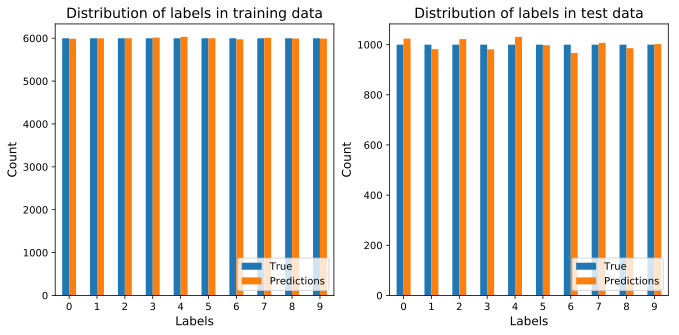

In [34]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(11, 5), nrows=1, ncols=2)

df[['Y Train', 'Pred Train']].plot.bar(ax=axes[0], rot=0)
axes[0].set_title("Distribution of labels in training data", fontsize=14)
axes[0].set_xlabel("Labels", fontsize=12)
axes[0].set_ylabel("Count", fontsize=12)
axes[0].legend(['True', 'Predictions'], loc='lower right')

df[['Y Test', 'Pred Test']].plot.bar(ax=axes[1], rot=0)
axes[1].set_title("Distribution of labels in test data", fontsize=14)
axes[1].set_xlabel("Labels", fontsize=12)
axes[1].set_ylabel("Count", fontsize=12)
axes[1].legend(['True', 'Predictions'], loc='lower right')

plt.show()

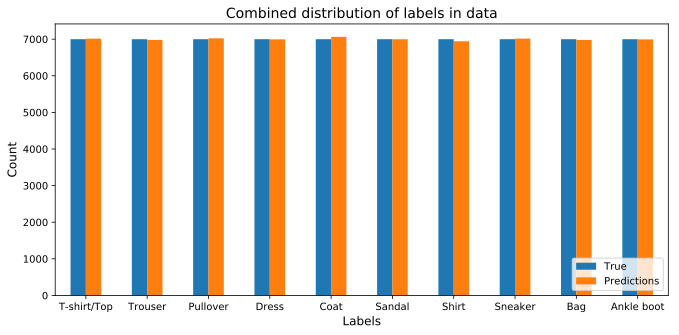

In [35]:
df[['Y Combined', 'Pred Combined']].plot.bar(figsize=(11, 5), rot=0)
plt.title("Combined distribution of labels in data", fontsize=14)
plt.xlabel("Labels", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(np.arange(10), names.values())
plt.legend(['True', 'Predictions'], loc='lower right')
plt.show()

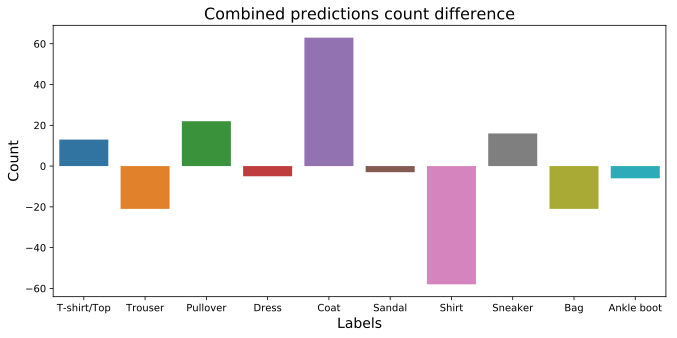

In [36]:
import seaborn as sns

plt.figure(figsize=[11, 5])
sns.barplot(data=df[['Combined Diff']].T)
plt.title("Combined predictions count difference", fontsize=16)
plt.xlabel("Labels", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(np.arange(10), names.values())
plt.show()

## Correctly classified images

In [37]:
import matplotlib.pyplot as plt

def plot_images(X, y, p, num_rc, indices, cmap='gray'):
    fig, ax_arr = plt.subplots(nrows=num_rc, ncols=num_rc, figsize=[12, 12])
    for i, ax in enumerate(ax_arr.reshape(-1)):
        ax.imshow(X[indices[i]].reshape(28, 28), cmap=cmap)
        ax.set_title(f"True: {names[y[indices[i]][0]]} | Pred: {names[p[indices[i]][0]]}", fontsize=10)
        ax.set_axis_off()

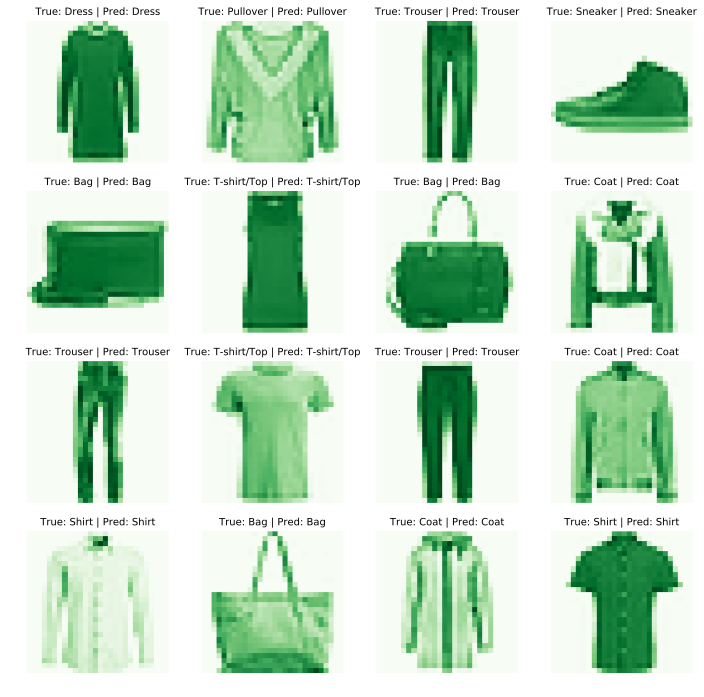

In [38]:
plot_images(X_test,
            y_test,
            p_test,
            4,
            np.random.choice(c_test, size=25, replace=False),
            cmap='Greens')

## Incorrectly classified images

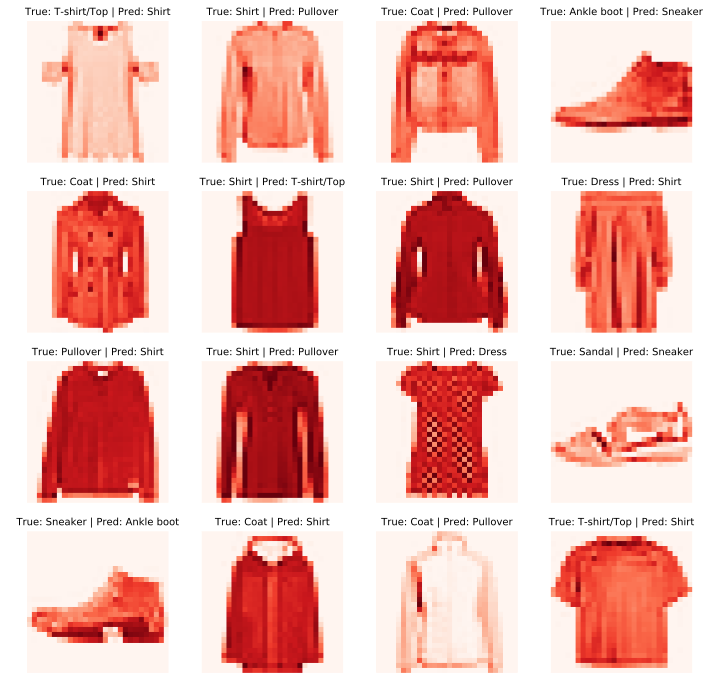

In [39]:
plot_images(X_test,
            y_test,
            p_test,
            4,
            np.random.choice(i_test, size=25, replace=False),
            cmap='Reds')

## Hidden layers weights visualization

### First hidden layer

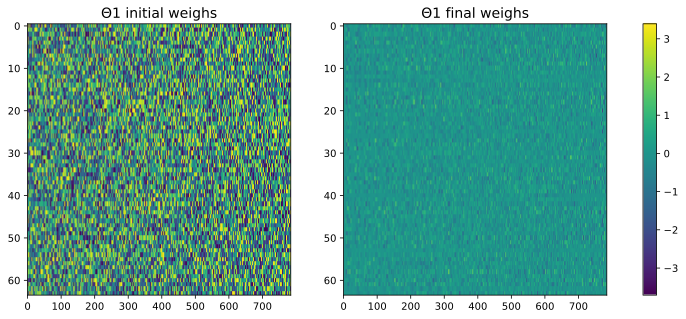

In [40]:
def plot_weights(weights, name):
    fig, ax_arr = plt.subplots(1,2, figsize=[13, 5])
    for ax, w, state, i in zip(ax_arr, weights, ['initial', 'final'], [1, 2]):
        last = ax.imshow(w, cmap='viridis', aspect='auto')
        ax.set_title(f"{name} {state} weighs", fontsize=14)
        ax.grid(False)
    fig.colorbar(last, ax=list(ax_arr))
    plt.show()


plot_weights([Θ1_start, Θ1], 'Θ1')

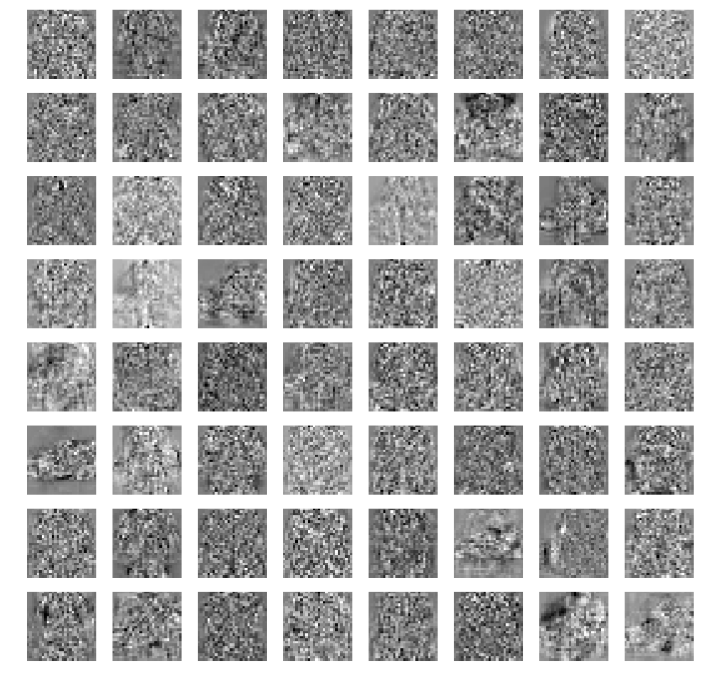

In [41]:
def plot_groups(Θ, group_size, num_groups):
    Θv = [Θ[:, 1:][i].reshape(group_size, group_size) for i in range(num_groups)]
    num_rc = int(np.sqrt(num_groups))
    fig, ax_arr = plt.subplots(nrows=num_rc, ncols=num_rc, figsize=[12, 12])
    for i, ax in enumerate(ax_arr.reshape(-1)):
        ax.imshow(Θv[i], cmap='gray')
        ax.set_axis_off()


plot_groups(Θ1, group_size=28, num_groups=hidden_layer_size)

### Second hidden layer

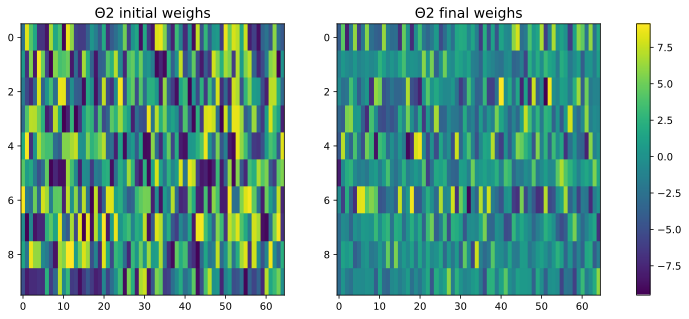

In [42]:
plot_weights([Θ2_start, Θ2], 'Θ2')

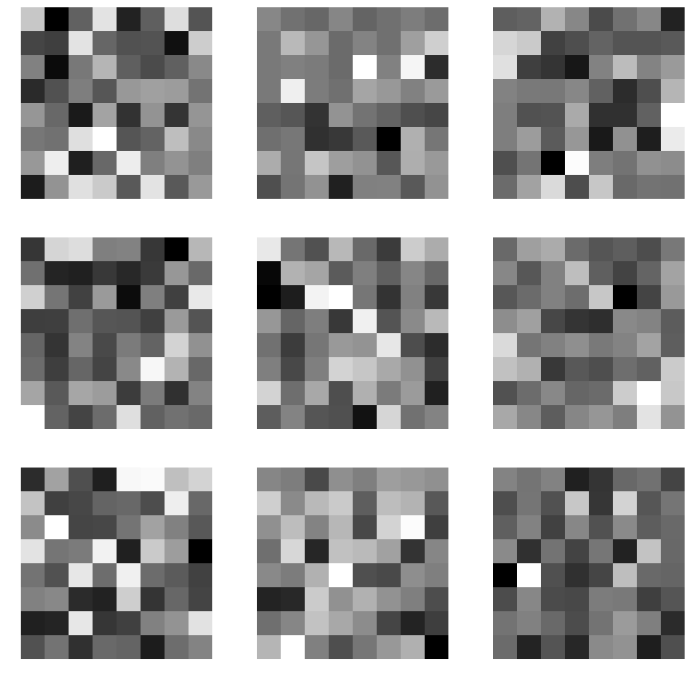

In [43]:
plot_groups(Θ2, group_size=int(np.sqrt(hidden_layer_size)), num_groups=9)